## How to generate Possion process sequences?

# Method1. Using Poisson process, the time interval of event occurrence satisfies the exponential distribution of $\lambda e^{-\lambda t}$ ($\lambda$ is the number of events per unit time), and the average value of exponential distribution is  $\frac{T}{rate}$. The intervals here are all integers.

In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt

def possion_generation(T,rate,dt): 
    import random
    t= 0

    spike = np.array([0 for _ in range(int(T/dt))]) #spike的位数和总步数一致，单位时间是一个步数
    while True:
        t+= random.expovariate(((rate*dt)/1000))#产生间隔，指数分布的参数lambda=rate/T。在这里的单位时间是dt/1000,因此，单位时间内发生的事件数目为rate*dt/1000
        if t>int(T/dt):
            break
        spike[int(t)]=1 
    return spike
def pulse(N_x,Time,dt,rate):
    pulse_=[]
    for i in range(N_x):
        pulse_.append(possion_generation(Time,rate,dt))
    pulse_=np.array(pulse_).T
    return pulse_

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

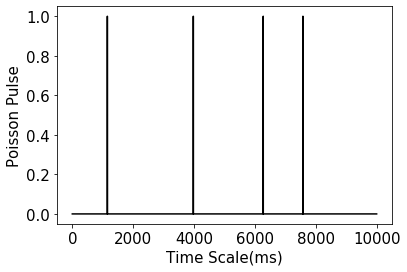

In [2]:
plt.plot(pulse(4,1000,0.1,5)[:,2],color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

# Methdod2. By using the exponential distribution of the time interval of events in Poisson process, the cumulative distribution function (CDF) can be written as $CDF = P = 1-e ^ {- [lambda t} $, and CDF returns the probability that the time interval between successive arrivals is less than or equal to a certain value T. We write its inverse function $f ^ {- 1}_ {t}(p) = -\frac{ln(1-p)}{\lambda}$。 We can also input the probability p with uniform distribution between 0 and 1 to return that the time interval between events is 0-t

In [3]:
def possion_generation2(T,rate,dt): 
    import random
    import math

    _lambda = rate*dt/1000
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    arrival=[]
    while True:
        p = random.random()
        _inter_arrival_time = -math.log(1.0 - p)/_lambda
        _arrival_time = _arrival_time + _inter_arrival_time
        if _arrival_time>int(T/dt):
            break
        arrival.append(int(_arrival_time))
    spike[(arrival)]=1
    plt.plot(spike[0:T])
    return spike

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

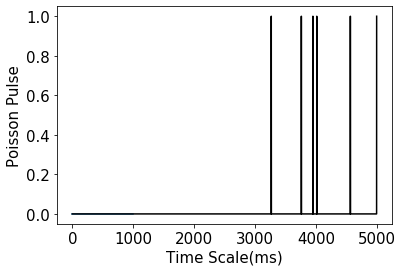

In [15]:
plt.plot(possion_generation2(1000,5,0.2),color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

# Method3. Using the arrival time of Poisson distribution satisfying gamma distribution $f(x)=\frac{x^{(\alpha-1)} \lambda^{\alpha} e^{(-\lambda x)}}{\Gamma(\alpha)}=\frac{x^{(\alpha-1)} e^{\left(-\frac{1}{\beta} x\right)}}{\beta^{\alpha} \Gamma(\alpha)}, \mathrm{x}>0$.



In [16]:
def poisoon_generation3(T,rate,dt):
    time_all=[]
    _lambda=rate*dt/T
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    while True:
        t= random.gammavariate(i, 1000/(rate*dt))
        if t>int(T/dt):
            break
        time_all.append(int(t))
    spike[(time_all)]=1
    
    return spike


In [26]:
#Sparsely connected matrix
def EI_M(Number1,Number2,pr,J):
    matrix=np.zeros((Number1,Number2))
    matrix_p=np.random.rand(Number1,Number2)
    matrix[matrix_p<pr]=J
    return matrix

N=10000
N_e=int(N*0.8)
N_i=int(N*0.2)
tau_m=20
V_t=-52
V_r=-70
p=0.1
tref=2
K_e=p*N_e
K_i = p*N_i
j_ee=25 #增大E的firing rate,
j_ie=112.5#对参数影响不大
j_ei=150#增大后，极大地使得E的voltage降低，降低E的firing rate, 提高I的firing rate
j_ii=250#增大有一点点影响voltage的幅度，调小会使得voltage变得很低，增大，降低E的firing rate，提高I的firing rate
j_exte=180#更改E的firing rate,对voltage影响没有这么大
j_exti=135#更改I的firing rate,并且极大降低voltage

J_ee=j_ee/np.sqrt(N); 
J_ie=j_ie/np.sqrt(N); 
J_ei=j_ei/np.sqrt(N); 
J_ii=j_ii/np.sqrt(N); 


J_exte=j_exte/np.sqrt(N);
J_exti=j_exti/np.sqrt(N);
#J_ext=0.5:itdepends on the condition
#delay=1:Omit it first


#connection matrices:
M_EE=EI_M(N_e,N_e,p,J_ee)
M_IE=EI_M(N_i,N_e,p,J_ie)
M_EI = EI_M(N_e,N_i,p,J_ei)
M_II =EI_M(N_i,N_i,p,J_ii)
#initial voltage
J_EXEE=EI_M(N_e,N_e,p,J_exte)
J_EXII=EI_M(N_i,N_e,p,J_exti)


## The matrice to realize the rest-time.
def update_matrix1(M):    
    N=np.array(M)*1
    N[np.where(M>0)]=0
    N[np.where(M==0)]=1    
    return N
def update_matrix2(M,dt,rest):
    N=np.array(M)*1
    N[M>=((rest/dt)-1)]=0
    return N
def turn_2_zero(M):
    if M<0:
        return 0
    else:
        return M
    
    
## The matrix to initialize the voltage      
def randlc(N_x,up,down):
    import random
    rando=[]
    for i in range(N_x):
        rando.append(random.uniform(down,up))
    return np.array(rando).reshape(N_x,1)

## Updating：
$$
{V_{i}^{\alpha}(t+dt)-V_{i}^{\alpha}(t)}=(-V_{i}^{\alpha}(t))\frac{dt}{\tau_m}+\int_{t}^{t+dt}\left(\sum_{j=1}^{N_{E}} J_{i j}^{\alpha E} \sum_{k} \delta\left(t-t_{j k}^{E}\right)-\sum_{j=1}^{N_{I}} J_{i j}^{\alpha I} \sum_{k} \delta\left(t-t_{j k}^{I}\right)+(f_{i}^{\alpha}(t))_{out}\right) dt,\\
(I_{i}^{\alpha}(t))_{out} =\int_{t}^{t+dt}{\sum_{j=1}^{N_{E}} J_{i j}^{out-\alpha} \sum_{k} \delta\left(t-t_{j k}^{out}\right)}dt,\\
I_{E}^{\alpha}(t) =\int_{t}^{t+dt}{\sum_{j=1}^{N_{E}} J_{i j}^{\alpha E} \sum_{k} \delta\left(t-t_{j k}^{E}\right)+\sum_{j=1}^{N_{E}} J_{i j}^{out-\alpha} \sum_{k} \delta\left(t-t_{j k}^{out}\right)}dt,\\
I_{I}^{\alpha}(t) = \int_{t}^{t+dt}{-\sum_{j=1}^{N_{I}} J_{i j}^{\alpha I} \sum_{k} \delta\left(t-t_{j k}^{I}\right)}dt
$$


In [29]:
def time_interaction(dt,T,tau,rate):
    max_pic=int(T/dt)
    pulse_e=pulse(N_e,T,dt,rate)
    pulse_i=pulse(N_e,T,dt,rate)
    V_e=randlc(N_e,V_t,V_r)
    V_i=randlc(N_i,V_t,V_r)
    V_e_all=[]
    V_i_all=[]
    Ve_count=np.zeros((N_e,1))
    Vi_count=np.zeros((N_i,1))
    current_i=[]
    current_e=[]
    currents=[]
    Total_spike_e=[]
    Total_spike_i = []
    for t in np.linspace(dt,T,max_pic):
        Ve_count=update_matrix2(Ve_count,dt,tref)
        Vi_count=update_matrix2(Vi_count,dt,tref)
        V_e_all.append((V_e)*1)
        V_i_all.append((V_i)*1)
        spick_num_ie=np.zeros((N_i,1))
        spick_num_ii=np.zeros((N_i,1))
                
        spick_num_ee=np.zeros((N_e,1))
        spick_num_ei=np.zeros((N_e,1))
        
        index_spike_e=np.where(V_e>=V_t)
        
        
        if (len(index_spike_e[0])>0):
            V_e[index_spike_e]=V_r
            for j in range(len(index_spike_e[0])): #对于每一个spike的e神经元e
                numee_index=np.where(M_EE[:,index_spike_e[0][j]]!=0)#找到从E神经元发出来连到E神经元的的权重非0值
                spick_num_ee[numee_index] = spick_num_ee[numee_index]+1#把这些spike加起来
                
                numie_index=np.where(M_IE[:,index_spike_e[0][j]]!=0)#找到从E神经元发出的权重非0值
                spick_num_ie[numie_index] = spick_num_ie[numie_index]+1#把这些spike加起来
          
        index_spike_i=np.where(V_i>=V_t)    
        if (len(index_spike_i[0])>0):
            V_i[index_spike_i]=V_r 
            for k in range(len(index_spike_i[0])):
                numei_index=np.where(M_EI[:,index_spike_i[0][k]]!=0)#找到和spike的神经元I相连的E神经元，若其连接存在，则说明该神经元E和一个此时spike的j神经元相连
                spick_num_ei[numei_index]=spick_num_ei[numei_index]+1 #这些神经元e都应该为j的存在而+1
                
                numii_index=np.where(M_II[:,index_spike_i[0][k]]!=0)#找到和spike的神经元I相连的I神经元，若其连接存在，则说明该神经元I和一个此时spike的j神经元相连
                spick_num_ii[numii_index] = spick_num_ii[numii_index]+1#这些神经元i都应该为j的存在而+1
                
        list_e=list(set(list(np.where(Ve_count>0)[0])+list(index_spike_e[0])))
        list_i=list(set(list(np.where(Vi_count>0)[0])+list(index_spike_i[0])))

        Ve_count[list_e] = Ve_count[list_e]+1
        Vi_count[list_i] = Vi_count[list_i]+1

        s1=pulse_e[int(t/dt-1)].reshape(N_e,1)
        s2=pulse_i[int(t/dt-1)].reshape(N_e,1)
        V_e=V_e*1+((J_ee*spick_num_ee-J_ei*spick_num_ei+np.dot(J_EXEE,s1))*1)*update_matrix1(Ve_count)
        V_i = V_i*1+ ((J_ie*spick_num_ie-J_ii*spick_num_ii*1+np.dot(J_EXII,s2))*1)*update_matrix1(Vi_count)
        
        V_e = V_e*1+(dt/tau)*(-V_e+V_r)*1*update_matrix1(Ve_count)
        V_i = V_i*1+(dt/tau)*(-V_i+V_r)*1*update_matrix1(Vi_count)
        Total_spike_e.append(len(index_spike_e[0]))
        Total_spike_i.append(len(index_spike_i[0]))
    
        current_e.append(((J_ee*spick_num_ee+np.dot(J_EXEE,s1))))
        current_i.append(-J_ei*spick_num_ei*1)
    r_e = np.sum(Total_spike_e)/((T*0.001)*N_e)
    r_i = np.sum(Total_spike_i)/((T*0.001)*N_i)
    print(r_e)
    print(r_i)

    return V_e_all,V_i_all,current_e,current_i,r_e,r_i
            
            

## Calculating and simulating the theoretical average firing rate:

In [ ]:
r_E=[]
r_I = []
for i in range(100):
    V_e_all,V_i_all,current_e,current_i,r_e,r_i=time_interaction(0.5,1000,20,10,10,(i+1))
    r_E.append(r_e)
    r_I.append(r_i)
    print(r_E)


In [ ]:
w_EE = p*N_e*J_ee/(p*N_e*J_exte)
w_EI = -p*N_i*J_ei/(p*N_e*J_exte)
w_IE = p*N_e*J_ie/(p*N_e*J_exte)
w_II = -p*N_i*J_ii/(p*N_e*J_exte)
W = np.array([w_EE,w_EI,w_IE,w_II]).reshape(2,2)
W_1 = (np.linalg.inv(W)) 
w_EX = p*N_e*J_exte/(p*N_e*J_exte)
w_IX = p*N_e*J_exti/(p*N_e*J_exte)
r_et = []
r_it = []
for i in range(100):
    W_2 = np.array([w_EX,w_IX])
    r_X = np.array([i+1,i+1])
    W_2 = (W_2*r_X).reshape(2,1)
    r_et.append((np.dot(-W_1,W_2))[0])
    r_it.append((np.dot(-W_1,W_2))[1])
r_et = np.array(r_et)/max(r_E)
r_it = np.array(r_it)/max(r_I)
## max1,max2 is the max firing rate for E and I population,which is saturated.

In [30]:
V_e_all,V_i_all,current_e,current_i=time_interaction(0.2,400,tau=20)


12.3521875
35.98


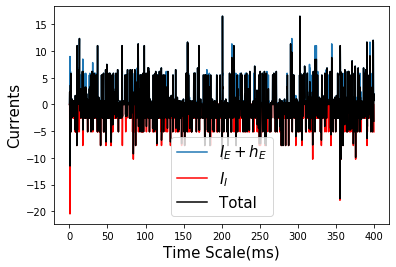

In [69]:
#plot the figure of currents
np.shape(current_e)
T=400
dt=0.2
xx=np.linspace(dt,T,int(T/dt))
xx=np.linspace(dt,T,int(T/dt))
plt.plot(xx,np.squeeze(current_e)[:,M],label=r'$I_E+h_E$')
plt.plot(xx,np.squeeze(current_i)[:,M],color='red',label=r'$I_I$')
plt.plot(xx,(np.array(np.squeeze(current_e)[:,M])+np.squeeze(np.squeeze(current_i)[:,M])),label='Total',color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Currents",fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('currents.pdf',dpi=1000, bbox_inches = 'tight')

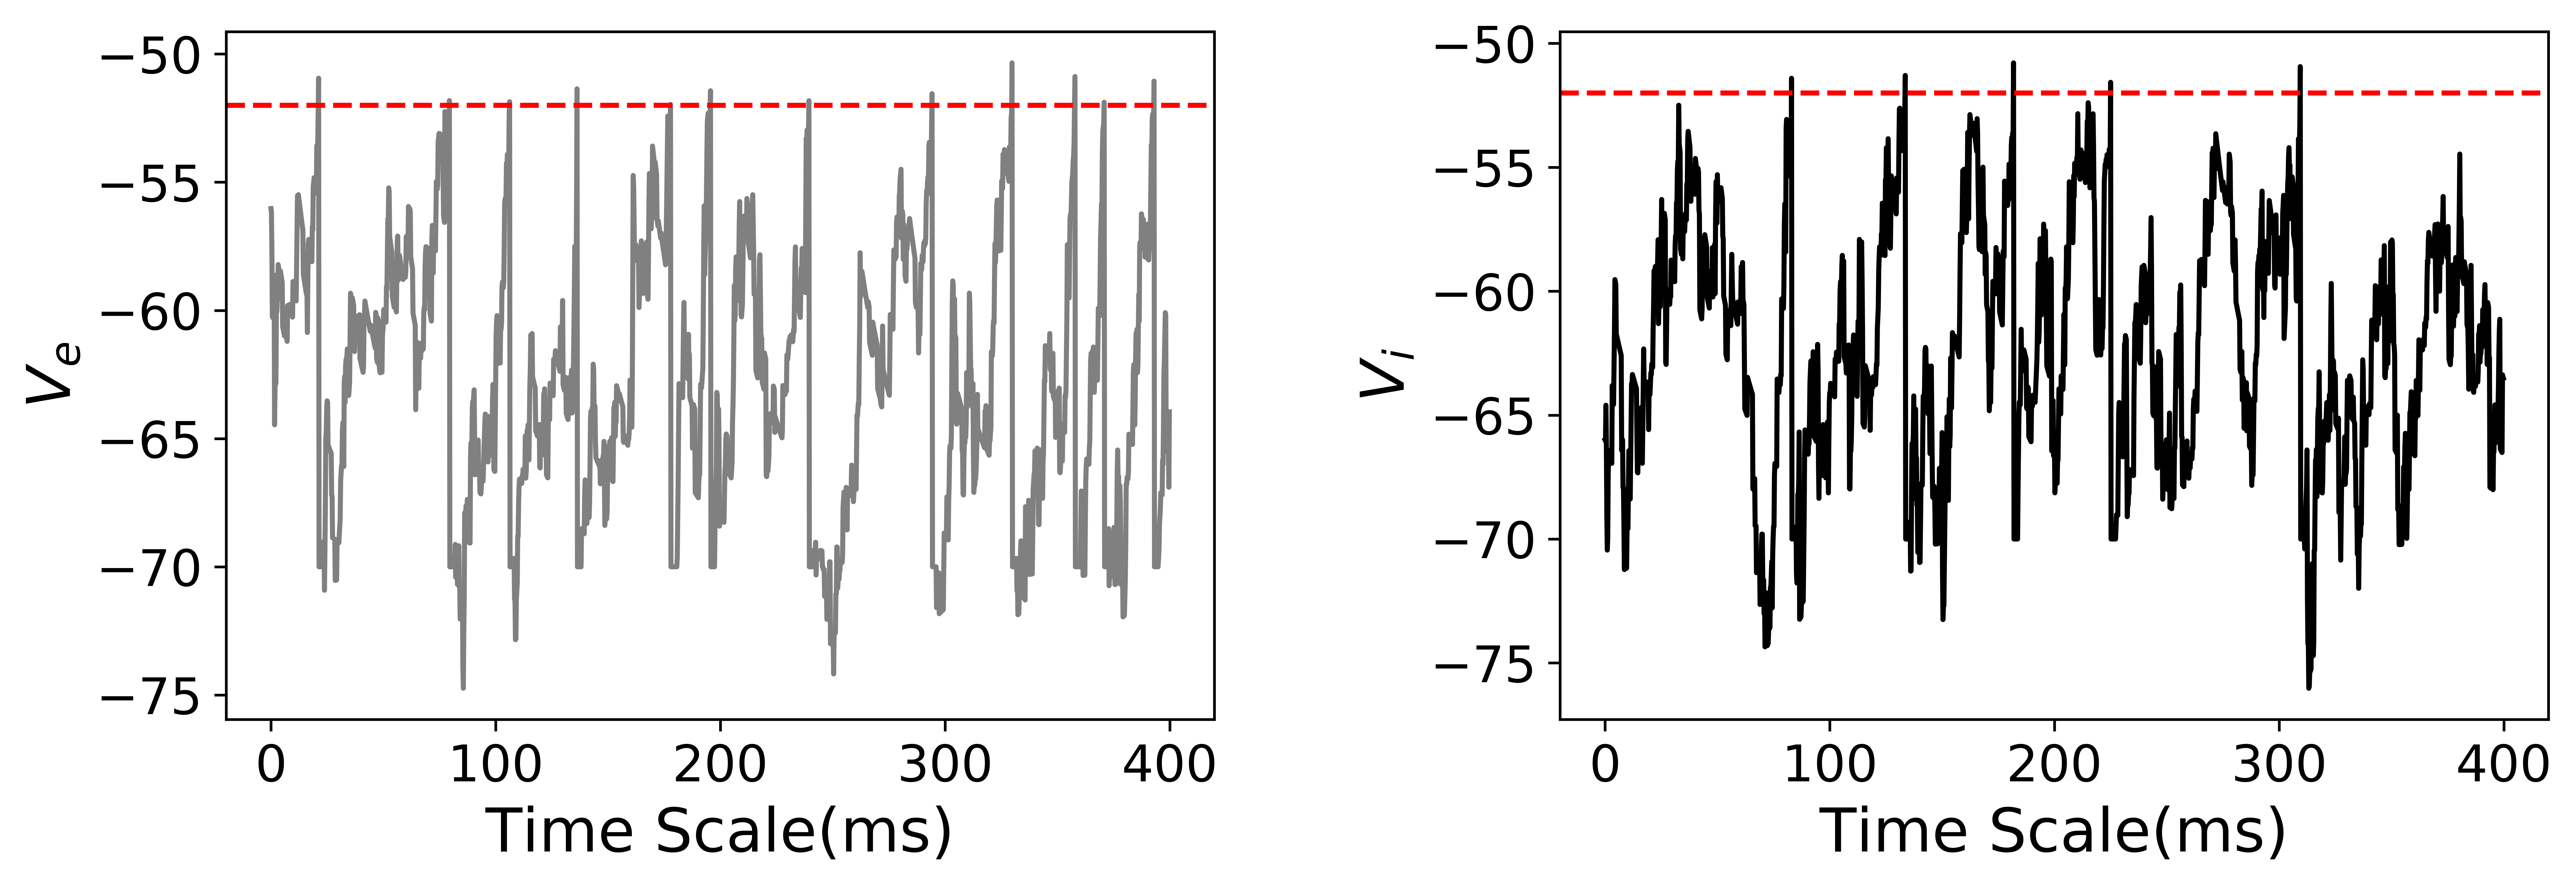

In [264]:
# plot the figure of membrane potential
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

fig = plt.figure(num=2, figsize=(12,8),dpi=1000)
subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.25,wspace=0.35)
ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2)
number=7
xx=np.linspace(0,(400-0.2),int(400/0.2))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8


ax1.plot(xx,np.squeeze(V_e_all)[:,139],color='grey')

ax1.set_xlabel('Time Scale(ms)',fontdict={'size'   : 18})
ax1.set_ylabel(r'$V_e$',fontdict={'size'   : 18})
ax1.axhline(y=-52, color='red', linestyle='--')
ax1.tick_params(labelsize=15) 

ax2.plot(xx,np.squeeze(V_i_all)[:,139],color='black')


ax2.set_xlabel('Time Scale(ms)',size=18)
ax2.set_ylabel(r'$V_i$',fontdict={'size'   : 18})
ax2.axhline(y=-52, color='red', linestyle='--')
ax2.tick_params(labelsize=15) 
# plt.savefig('membrane.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()